In [66]:
import iaml01cw2_helpers
import iaml01cw2_my_helpers
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from math import sqrt
import math
import matplotlib.pyplot as plt

In [29]:
# Q1.1
def iaml01cw2_q1_1(datapath):
    Xtrn, Ytrn, Xtst, Ytst = iaml01cw2_helpers.load_FashionMNIST(datapath)
    X_mean, Xtrn_nm, Xtst_nm = iaml01cw2_my_helpers.preprocessing(Xtrn, Ytrn, Xtst, Ytst)
    return Xtrn, Ytrn, Xtst, Ytst, X_mean, Xtrn_nm, Xtst_nm
Xtrn, Ytrn, Xtst, Ytst, X_mean, Xtrn_nm, Xtst_nm=iaml01cw2_q1_1('data')
print(Xtrn_nm[0,0:4],Xtrn_nm[-1,0:4]) 

[-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04] [-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04]


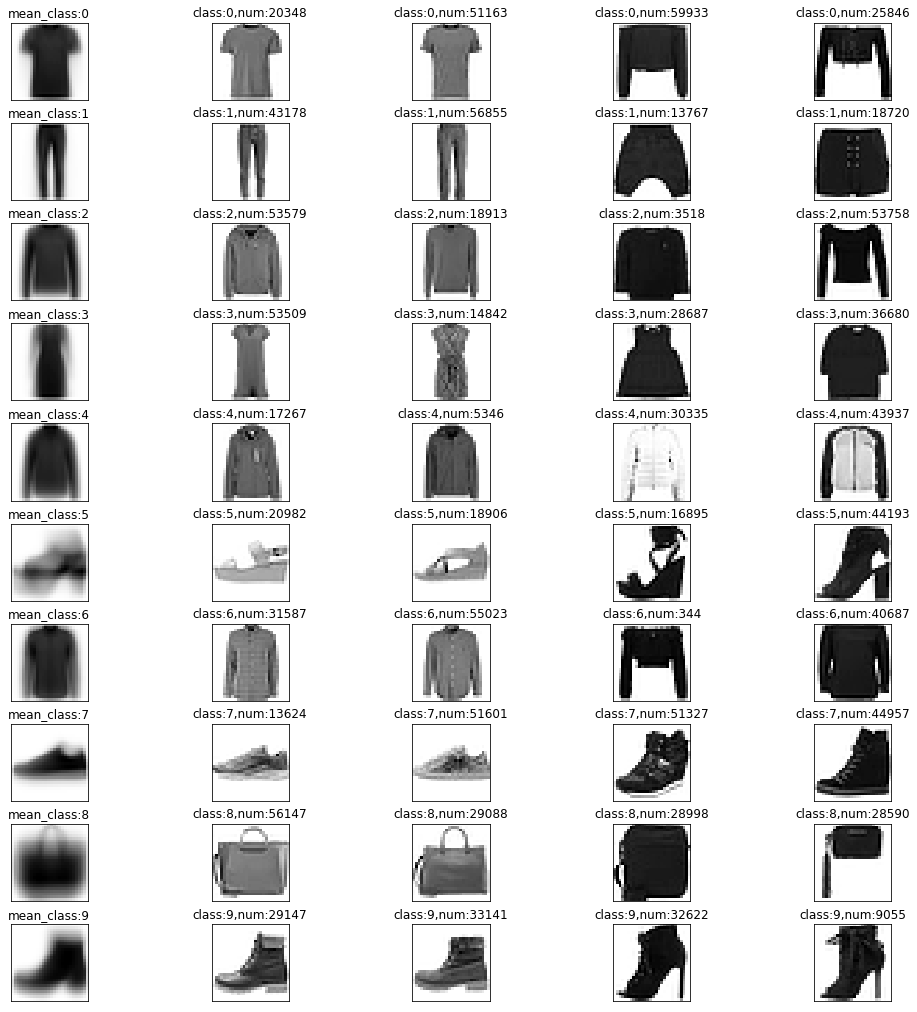

In [30]:
# Q1.2
def iaml01cw2_q1_2(Xtrn,Ytrn):
    plt.figure(figsize=(18,18))
    i=np.arange(0,10,1)
    j=np.arange(0,5,1)
    for a in i:
        c=Xtrn[np.where(Ytrn==a)]
        index_Y=np.array(np.where(Ytrn==a))
        cm=np.mean(c,axis=0)
        d = np.sqrt(np.sum(np.asarray(cm - c)**2, axis=1))
        cmax=c[np.argpartition(d,-2)[-2:]]
        cmin=c[np.argpartition(d,2)[0:2]]
        index_c=np.hstack((np.argpartition(d,-2)[-2:],np.argpartition(d,2)[0:2]))
        index=index_Y[0][index_c]
        c_all=np.vstack((cm,np.vstack((cmin,cmax))))
        for b in j:
            cn=c_all[b,:].reshape(28,28)
            plt.subplot(10,5,(5*(a)+b+1))
            plt.imshow(cn,cmap='gray_r')
            if b == 0:
                plt.title('mean_class:%d'%(a,))
            else:
                plt.title('class:%d,num:%d'%(a, index[b-1]))
            plt.xticks([])
            plt.yticks([])
    plt.subplots_adjust(wspace =0, hspace =0.3)
iaml01cw2_q1_2(Xtrn,Ytrn)   # comment this out when you run the function

In [54]:
# Q1.3
def iaml01cw2_q1_3(Xtrn_nm,Ytrn):
    pca=PCA(n_components=784)
    pca.fit(Xtrn_nm)
    variance = pca.explained_variance_
    return variance,pca
variance,pca=iaml01cw2_q1_3(Xtrn_nm,Ytrn)
print(np.round(variance[0:5],3))

[19.81  12.112  4.106  3.382  2.625]


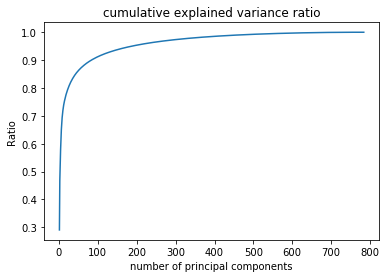

In [62]:
# Q1.4
def iaml01cw2_q1_4(pca):
    k=np.arange(1,785,1)
    var_ratio = pca.explained_variance_ratio_
    var_sum=[]
    var=0
    for n in k:
         var=np.sum(var_ratio[0:n])
         var_sum.append(var)
    plt.plot(k,var_sum)
    plt.title('cumulative explained variance ratio')
    plt.ylabel('Ratio')
    plt.xlabel('number of principal components')
iaml01cw2_q1_4(pca)
#While K increasing, cumulative explained variance increase rapidly when K is small and increase slowly when K is large.
#inflection point of K is around 80, where the model have the best cost performance

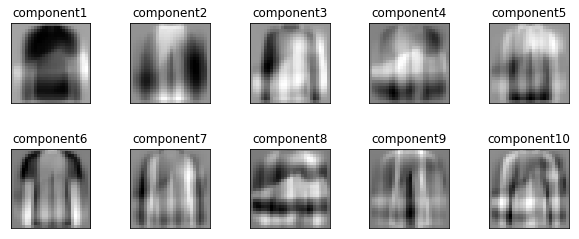

In [45]:
# Q1.5
def iaml01cw2_q1_5(pca):
    plt.figure(figsize=(10,10))
    for m in np.arange(1,11,1):
        plt.subplot(2,5,m)
        plt.imshow(pca.components_[m-1,:].reshape(28,28),cmap='gray_r')
        plt.title("component%d"%(m,))
        plt.xticks([])
        plt.yticks([])
    plt.subplots_adjust(wspace =0.5, hspace =-0.7)
iaml01cw2_q1_5(pca)
#There are serval class in data, including cloth, pants, shoe, bag and dress
#principal component include the general shape of this class, cloth is the main class among this sample, shoes is the second main class.

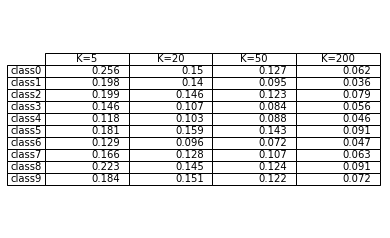

In [72]:
# Q1.6
def iaml01cw2_q1_6(Xtrn_nm):
    i=np.arange(0,10,1)
    K=[5,20,50,200]
    c_first=[]
    for a in i:
        c=Xtrn_nm[np.where(Ytrn==a)]
        c_first.append(c[0,:])
    c_first=np.array(c_first)
    KRMSE=[]
    for m in K:
        pca1=PCA(n_components=m)
        pca1.fit(Xtrn_nm)
        c_first_e=pca1.transform(c_first)
        c_first_n=pca1.inverse_transform(c_first_e)
        iRMSE=[]
        for a in i:
            RMSE=sqrt(mean_squared_error(c_first[a,:],c_first_n[a,:]))
            iRMSE.append(RMSE)
        KRMSE.append(iRMSE)
    RMSE_table=np.around(np.array(KRMSE).reshape(4,10),3).T
    plt.figure()
    col= ['K=5','K=20','K=50','K=200']
    row = ['class0','class1','class2','class3','class4','class5','class6','class7','class8','class9']
    my_table = plt.table(cellText=RMSE_table,rowLabels=row, colLabels=col, loc='center')
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()
iaml01cw2_q1_6(Xtrn_nm)

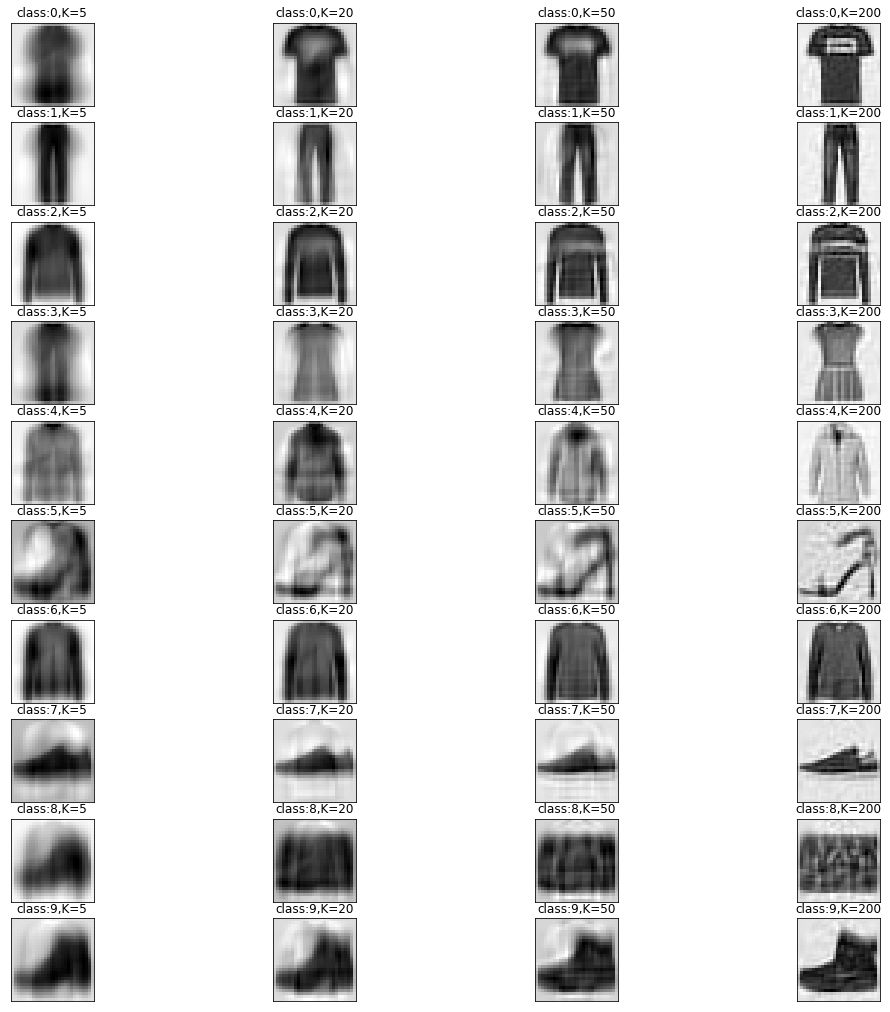

In [73]:
# Q1.7
def iaml01cw2_q1_7(Xtrn_nm,pca,X_mean):
    plt.figure(figsize=(18,18))
    m=5
    i=np.arange(0,10,1)
    c_first=[]
    for a in i:
        c=Xtrn_nm[np.where(Ytrn==a)]
        c_first.append(c[0,:])
    c_first=np.array(c_first)
    for a in i:
        pca=PCA(n_components=m)
        pca.fit(Xtrn_nm)
        c_first_e=pca.transform(c_first)
        c_first_n=pca.inverse_transform(c_first_e)+X_mean
        plt.subplot(10,4,4*a+1)
        plt.imshow(c_first_n[a,:].reshape(28,28),cmap='gray_r')
        plt.title('class:%d,K=%d'%(a,m))
        plt.xticks([])
        plt.yticks([])
    m=20
    for a in i:
        pca=PCA(n_components=m)
        pca.fit(Xtrn_nm)
        c_first_e=pca.transform(c_first)
        c_first_n=pca.inverse_transform(c_first_e)+X_mean
        plt.subplot(10,4,4*a+2)
        plt.imshow(c_first_n[a,:].reshape(28,28),cmap='gray_r')
        plt.title('class:%d,K=%d'%(a,m))
        plt.xticks([])
        plt.yticks([])
    m=50
    for a in i:
        pca=PCA(n_components=m)
        pca.fit(Xtrn_nm)
        c_first_e=pca.transform(c_first)
        c_first_n=pca.inverse_transform(c_first_e)+X_mean
        plt.subplot(10,4,4*a+3)
        plt.imshow(c_first_n[a,:].reshape(28,28),cmap='gray_r')
        plt.title('class:%d,K=%d'%(a,m))
        plt.xticks([])
        plt.yticks([])
    m=200
    for a in i:
        pca=PCA(n_components=m)
        pca.fit(Xtrn_nm)
        c_first_e=pca.transform(c_first)
        c_first_n=pca.inverse_transform(c_first_e)+X_mean
        plt.subplot(10,4,4*a+4)
        plt.imshow(c_first_n[a,:].reshape(28,28),cmap='gray_r')
        plt.title('class:%d,K=%d'%(a,m))
        plt.xticks([])
        plt.yticks([])   
iaml01cw2_q1_7(Xtrn_nm,pca,X_mean)
#when K increase from 5 to 200, the image become more clear.
#personlly, reconstructed sample is absolutely acceptable when K=200.
#200 component PCA can express the original data well in this case.

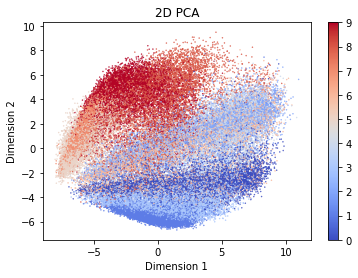

In [57]:
# Q1.8
def iaml01cw2_q1_8(Xtrn_nm,pca):
    x_d=pca.transform(Xtrn_nm)
    x_2d=x_d[:,[0,1]]
    plt.figure()
    plt.scatter(x_2d[:,0],x_2d[:,1],cmap='coolwarm',c=Ytrn,s=0.2)
    plt.title('2D PCA')
    plt.colorbar()
    plt.ylabel('Dimension 2')
    plt.xlabel('Dimension 1')
iaml01cw2_q1_8(Xtrn_nm,pca)
#two-dimensional PCA plance can't not separate all the class well,some class have the same distribution.
#two-dimensional PCA can separate boot(class 9,7) and cloth (class 0,1) well.
#the seperation depends on the main feature of the first and second principle components

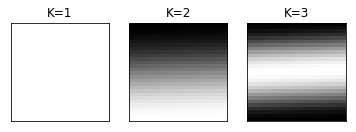

In [60]:
# Q1.9
def iaml01cw2_q1_9():
    for k in np.arange(1,4,1):
        cki=[]
        for i in np.arange(1,785,1):
            ck=math.cos(math.pi*(k-1)*(2*i-1)/(2*784))
            cki.append(ck)
        plt.subplot(1,3,k)
        plt.imshow(np.array(cki).reshape(28,28),cmap='gray_r')
        plt.title('K=%d'%(k,))
        plt.xticks([])
        plt.yticks([])  
    return cki
cki=iaml01cw2_q1_9()
#They are not similar to those of principle components
#DCT can apply to all kinds of image, but PCA trainning result can only apply to specific image data like fasion costume in this case.
#while K of DCT increase, image will be separated into more area to be able to reconstruct more detail.
#while K of PCA increase, the importance of the Kth component will decrease.
#while K of PCA is small, the pricipal components will still contain some feature of the data, but DCT don't.

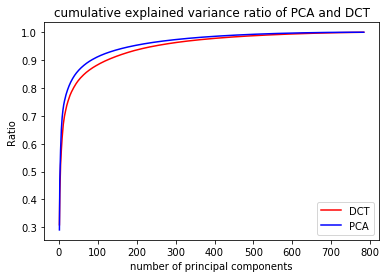

In [64]:
# Q1.10
def iaml01cw2_q1_10(var_sum):
    cki=[]
    for k in np.arange(1,785,1):
        for i in np.arange(1,785,1):
            ck=math.cos(math.pi*(k-1)*(2*i-1)/(2*784))
            cki.append(ck)
    Ck=np.array(cki).reshape(784,784).T
    Zk=Xtrn_nm.dot(Ck)
    var_Zk=np.var(Zk,axis=0)
    var_ratio_DCT=sorted(var_Zk/np.sum(var_Zk),reverse=True)
    var_sum_DCT=[]
    var_DCT=0
    k=np.arange(1,785,1)
    for n in k:
         var_DCT=np.sum(var_ratio_DCT[0:n])
         var_sum_DCT.append(var_DCT)
    plt.plot(k,np.array(var_sum_DCT),c='red',label='DCT')
    plt.title('cumulative explained variance ratio of PCA and DCT' )
    plt.ylabel('Ratio')
    plt.xlabel('number of principal components')
    plt.plot(k,var_sum,c='blue',label='PCA')
    plt.legend()
iaml01cw2_q1_10(var_sum)